## Análise de Emissões de Gases de Efeito Estufa (GEE) em Brasília

- Alunos: Gabriel Loures e Kauã Fernandes

**Objetivo:** Realizar uma análise exploratória sobre os dados de emissão de gases de efeito estufa para a cidade de Brasília (DF), conforme o arquivo "gases.csv".

Este notebook irá abordar:
1.  O carregamento e a preparação dos dados.
2.  A análise da evolução das emissões ao longo dos anos.
3.  A identificação dos principais setores emissores.
4.  A proporção de cada gás emitido.
5.  A apresentação dos resultados através de visualizações gráficas.

In [ ]:
# Importando as bibliotecas necessárias para a análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando o estilo dos gráficos para melhor visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


### 1. Carregamento e Preparação dos Dados

Nesta etapa, vamos carregar o arquivo "gases.csv". A estrutura original dos dados está no formato "wide", onde cada ano é uma coluna. Para facilitar a manipulação e a criação de gráficos, vamos transformar os dados para o formato "long", onde teremos uma coluna para o ano e outra para o valor da emissão.

In [70]:
# Carregando o dataset
try:
    df = pd.read_csv('gases.csv')
    print("Dataset carregado com sucesso.")
except FileNotFoundError:
    print("Erro: Arquivo 'gases.csv' não encontrado. Verifique o caminho do arquivo.")

# Identificando as colunas que não são anos (colunas de identificação)
id_vars = list(df.columns[:11])

# Identificando as colunas de anos (colunas de valores)
value_vars = list(df.columns[11:])

# Transformando o DataFrame de 'wide' para 'long' usando a função melt()
df_long = pd.melt(df, id_vars=id_vars, value_vars=value_vars, var_name='Ano', value_name='Emissao')

# Convertendo a coluna 'Ano' para o tipo numérico e tratando valores nulos
df_long['Ano'] = pd.to_numeric(df_long['Ano'])
df_long['Emissao'] = df_long['Emissao'].fillna(0)

# Exibindo as primeiras linhas do DataFrame transformado
print("\nFormato do DataFrame após a transformação:")
df_long.head()

Dataset carregado com sucesso.

Formato do DataFrame após a transformação:


,Setor de emissão,Categoria emissora,Sub-categoria emissora,Produto ou sistema,Detalhamento,Recorte,Atividade geral,Bioma,Emissão/Remoção/Bunker,Gás,Cidade,Ano,Emissao
0,Agropecuária,Cultivo de arroz,Cultivo em sistema irrigado inundado,Arroz,Vegetal,Diretas,Agricultura,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,2.937752
1,Agropecuária,Fermentação entérica,Processo de digestão de animais ruminantes,Asinino,Animal,Diretas,Pecuária,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,0.630000
2,Agropecuária,Fermentação entérica,Processo de digestão de animais ruminantes,Bubalino,Animal,Diretas,Pecuária,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,0.000000
3,Agropecuária,Fermentação entérica,Processo de digestão de animais ruminantes,Caprino,Animal,Diretas,Pecuária,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,2.515000
4,Agropecuária,Fermentação entérica,Processo de digestão de animais ruminantes,Equino,Animal,Diretas,Pecuária,Cerrado,Emissão,CH4 (t),Brasília (DF),1970,55.854000


### 2. Análise Exploratória de Dados (EDA)

Com os dados devidamente estruturados, vamos começar a extrair informações relevantes respondendo a algumas perguntas:

* Como as emissões totais evoluíram ao longo do tempo?
* Quais são os principais setores responsáveis pelas emissões?
* Qual é a magnitude das emissões para cada tipo de gás?

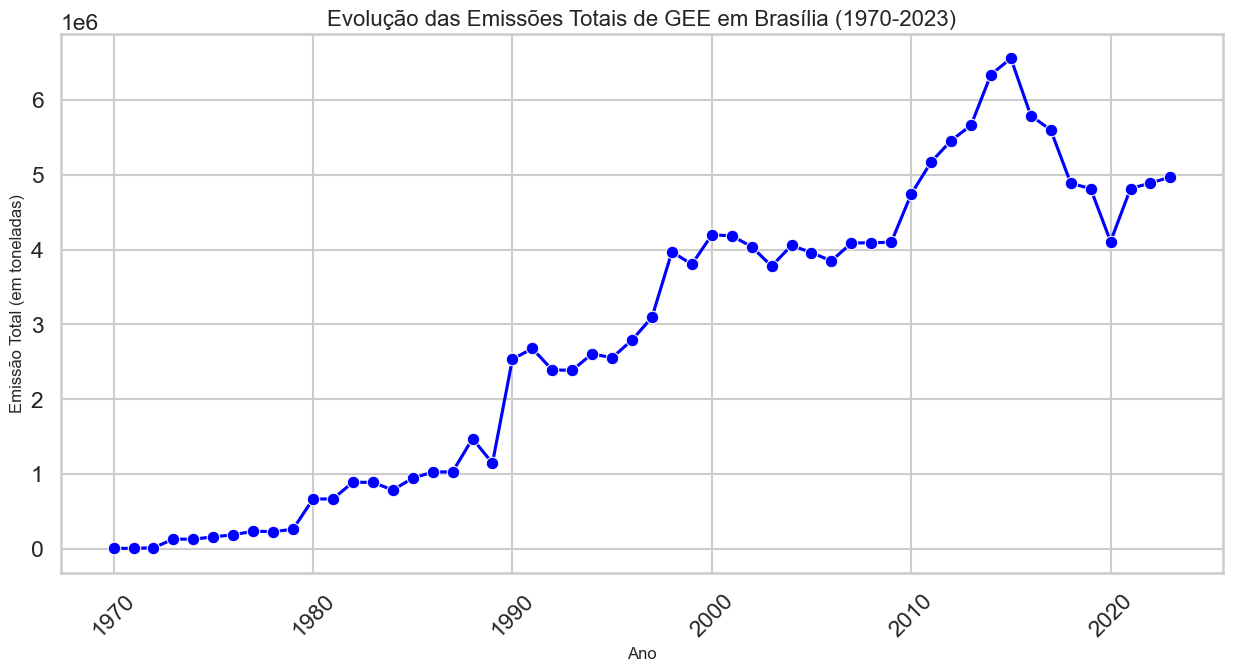

In [74]:
# Agrupando os dados por ano e somando as emissões para obter o total anual
emissao_anual = df_long.groupby('Ano')['Emissao'].sum().reset_index()

# Criando o gráfico de linha para a evolução das emissões
plt.figure(figsize=(15, 7))
sns.lineplot(x='Ano', y='Emissao', data=emissao_anual, marker='o', color='b')

# Adicionando títulos e rótulos
plt.title('Evolução das Emissões Totais de GEE em Brasília (1970-2023)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Emissão Total (em toneladas)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Interpretação:** O gráfico acima mostra a tendência das emissões totais de gases de efeito estufa em Brasília. Podemos observar um crescimento notável ao longo das décadas, com uma aceleração mais acentuada a partir dos anos 2000, indicando um aumento nas atividades emissoras na região.

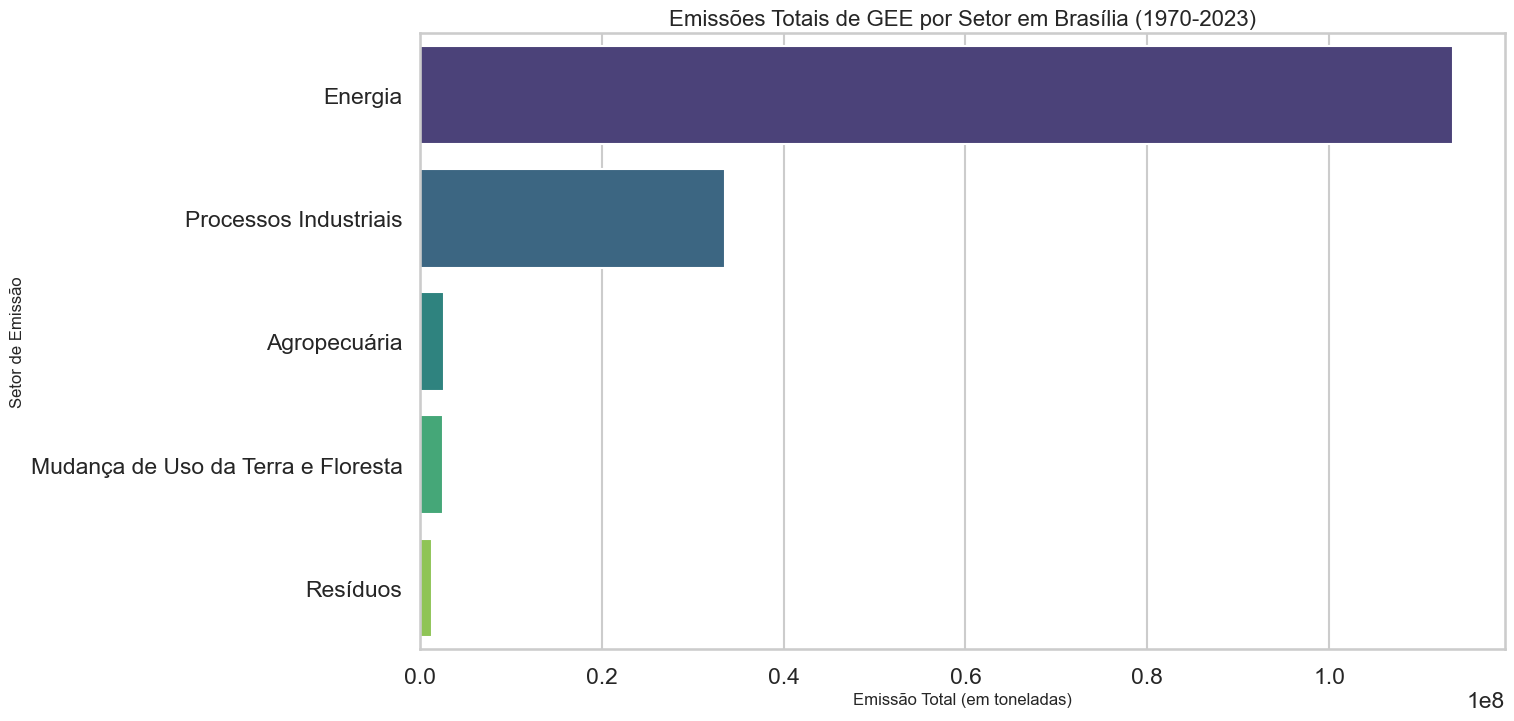

In [ ]:
# Agrupando os dados por setor e somando as emissões
emissao_por_setor = df_long.groupby('Setor de emissão')['Emissao'].sum().sort_values(ascending=False)

# Criando o gráfico de barras para as emissões por setor
plt.figure(figsize=(14, 8))
sns.barplot(x=emissao_por_setor.values,
            y=emissao_por_setor.index,
            hue=emissao_por_setor.index, 
            dodge=False,                   
            palette='viridis',
            orient='h',
            legend=False)                  

plt.title('Emissões Totais de GEE por Setor em Brasília (1970-2023)', fontsize=16)
plt.xlabel('Emissão Total (em toneladas)', fontsize=12)
plt.ylabel('Setor de Emissão', fontsize=12)
plt.show()

**Interpretação:** O gráfico de barras evidencia que o setor de **Energia** é o principal responsável pelas emissões em Brasília, seguido por **Agropecuária** e **Resíduos**. Isso indica que políticas públicas focadas em transporte sustentável e na matriz energética da cidade teriam o maior impacto na mitigação das emissões.

### Análise 3: Magnitude da Emissão por Tipo de Gás

Para visualizar a contribuição de cada gás, gráficos de proporção como o de pizza podem ficar poluídos devido ao grande número de categorias. Por isso, optamos por um **Gráfico de Lollipop**, que apresenta os mesmos dados de um gráfico de barras, mas com um visual mais limpo e minimalista, permitindo uma comparação clara entre a magnitude de emissão de cada gás.

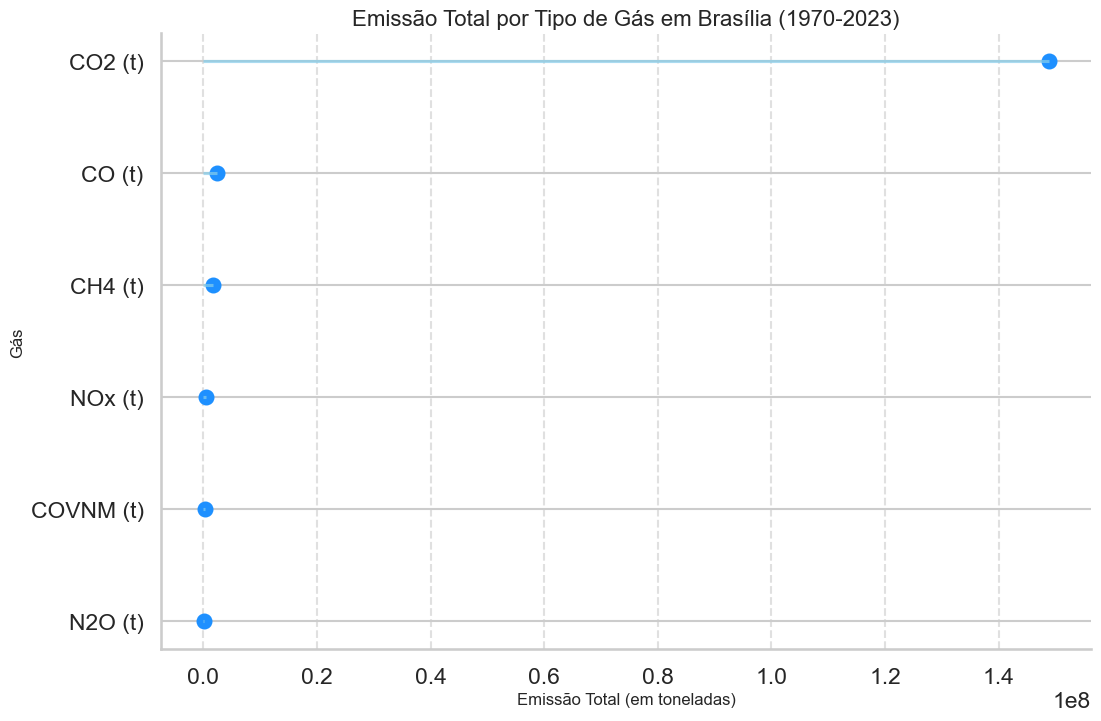

In [87]:
# Agrupando os dados por gás e somando as emissões
emissao_por_gas = df_long.groupby('Gás')['Emissao'].sum().sort_values(ascending=True)

# Removendo gases com emissão zero para não poluir o gráfico
emissao_por_gas = emissao_por_gas[emissao_por_gas > 0]

# Criando o gráfico de Lollipop
plt.figure(figsize=(12, 8))

# Criando as "hastes"
plt.hlines(
    y=emissao_por_gas.index,
    xmin=0,
    xmax=emissao_por_gas.values,
    color='skyblue',
    alpha=0.7
)

# Criando os "círculos" na ponta
plt.scatter(
    emissao_por_gas.values,
    emissao_por_gas.index,
    color='dodgerblue',
    s=100,
    alpha=1
)

# Adicionando títulos e rótulos
plt.title('Emissão Total por Tipo de Gás em Brasília (1970-2023)', fontsize=16)
plt.xlabel('Emissão Total (em toneladas)', fontsize=12)
plt.ylabel('Gás', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine()
plt.show()

**Interpretação:** O gráfico de Lollipop mostra claramente a magnitude das emissões para cada tipo de gás. O **CO2 (Dióxido de Carbono) e suas variantes de CO2 equivalente (CO2e)** se destacam como os gases com o maior volume total de emissão no período, o que é consistente com a liderança do setor de Energia. O Metano (CH4) e o Óxido Nitroso (N2O) vêm na sequência.

### 3. Conclusão

A análise dos dados de emissões de GEE para Brasília revelou os seguintes pontos-chave:

1.  **Tendência Temporal**: As emissões na cidade apresentaram uma forte tendência de aumento ao longo do período analisado, indicando a necessidade de monitoramento contínuo e políticas de mitigação.
2.  **Principais Fontes Emissoras**: O setor de **Energia** é o maior contribuinte para as emissões, sugerindo que o foco principal para a redução deve ser em áreas como a frota de veículos, o transporte público e o consumo de combustíveis fósseis.
3.  **Gases Preponderantes**: O **CO2 (e CO2 equivalente)** é o gás mais significativo em volume, o que está diretamente relacionado às atividades do setor de Energia, como a queima de combustíveis.